# VSCode, Copilot, Jupyter, Git, Mamba
### NYU[x] Research Tooling Meeting

Ellis Brown

10/09/2023



<br><br>

## 0. Why this matters?
---
Good tooling:
1. Accelerates experimentation
    - make more progress, faster
    - more robust code
2. Enables reproducibility
3. Facilitates collaboration

<br><br>

## 1. VSCode
---

Why I like it:
- Lightweight and fast
- Extensions / Plugins -> scales to power-use
  - Jupyter
  - Copilot
  - Git
  - Remote SSH
- Debugging
- Wide adoption / community / support

<br><br>

## 2. Jupyter
---
- interactive notebook + code execution
- great for experimentation, data exploration, and visualization
- lightweight way to test/develop your library code, interactively

<br>

### Jupyter + VSCode
- all of the features of the VSCode editor, ***native*** to the notebook experience 🔥
    - Copilot!
- compute clusters / HPC / Slurm:
    - can start a Jupyter server (e.g. in `tmux` session) <br>
      & connect to it

<br>

### Tip: extensions / "magic"
- autoreload: reloads imported modules before executing code
    - my 1st cell in ~ every notebook:<br>
        ```python
        %load_ext autoreload
        %autoreload 2
        ```
- VSCode Jupyter plots matplotlib inline automatically :)

<br><br>

## 3. GitHub Copilot
---
- GPT-3 powered Code Autocompletion (on steroids)
- *potentially best application of current generations of LLMs?*

Oct 2021 beta — changed the way I approach coding

<br>

### 3.1 Code As "Context"
ChatGPT as a lens to understand Copilot
- context = prompt + history (in ChatGPT parlance)
- the better the context, the better the suggestions

***Copilot Context:*** code + comments
1. in ***current file***
    - especially current/previous line
    - "Fill-In-the-Middle" paradigm
        - code before & after the cursor
2. from ***neighboring tabs***
    - Copilot attends significantly more to code if it is open in a tab
3. from ***other files in the repo***, (but much less likely to be added to the context)
    - other files in the repo are scanned too, but much less likely to be added to the context
    
<br>

https://github.blog/2023-05-17-how-github-copilot-is-getting-better-at-understanding-your-code/

<br>

### 3.2 Examples / Use Cases

Shortcuts:
1. `tab` to accept suggestion
2. `opt+[`, `opt+]` to cycle through suggestions


#### 3.2.1 generic code completion

In [9]:
def sqrt(x):


#### 3.2.2 documentation
> add documentation to the `sqrt` function


#### 3.2.3 test generation

In [ ]:
# create a test for the sqrt function
def test_sqrt():
    

#### 3.2.4 inline Q/A with the LLM
> e.g., look up the args for the autoreload magic function

In [ ]:
%load_ext autoreload
%autoreload 2 # Reload all local modules every time before executing the Python code typed.
# what does the 2 parameter mean?
# ans: it means reload all modules (except those excluded by %aimport) every time before executing the Python code typed.

# list options:
# 0: disable automatic reloading
# 1: reload all modules imported with %aimport every time before executing the Python code typed.
# 2: reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
# 3: reload all modules except those excluded by %aimport, and also modules that are excluded by default (e.g. sys and types)

#### 3.2.5 data manipulation / visualization
> e.g., plot the distribution of the `iris` dataset

<Figure size 800x600 with 0 Axes>

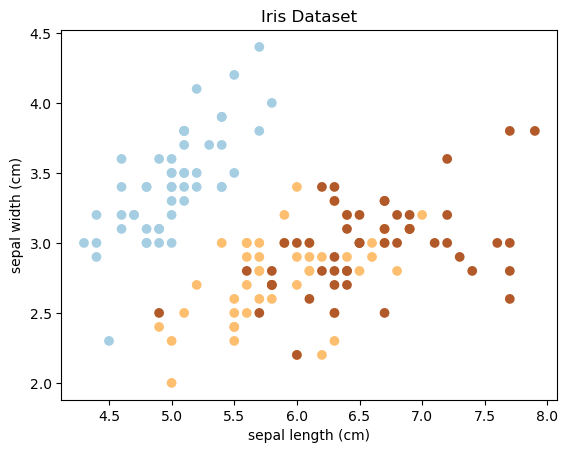

<Figure size 800x600 with 0 Axes>

In [4]:
"""
Load the iris dataset, and plot the first two features in a scatter plot.
"""
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# add a title to the plot
plt.title('Iris Dataset')

# make the plot smaller
plt.figure(figsize=(8, 6))

#### 3.2.6 complex APIs
> e.g., regex

In [5]:
# write a regex to match all words surrounded by parentheses
pattern1 = r"\(.*?\)"

import re

# test code
print(re.findall(pattern1, '(I want to match this)'))
print(re.findall(pattern1, 'I want to (match) this'))
print(re.findall(pattern1, 'I want to (match) this and (this) and (this)'))

['(I want to match this)']
['(match)']
['(match)', '(this)', '(this)']


In [ ]:
"""Hoare's Partitioning Scheme (Quicksort) in C
void partition(int array[], int low, int high) {
  // Choose the pivot element.
  int pivot = array[high];

  // Initialize the two subarrays.
  int i = low - 1;
  int j = high;

  // Iterate through the array, swapping elements as needed.
  while (i < j) {
    while (array[++i] <= pivot) {
    }
    while (array[--j] > pivot) {
    }
    if (i < j) {
      // Swap the elements at i and j.
      int temp = array[i];
      array[i] = array[j];
      array[j] = temp;
    }
  }

  // Swap the pivot element with the element at i.
  int temp = array[i + 1];
  array[i + 1] = array[high];
  array[high] = temp;

  // Recursively sort the two subarrays.
  partition(array, low, i);
  partition(array, i + 2, high);
}
---
translate this to python
"""

def partition(

#### 3.2.7 quick 1-off bash script completion

In [ ]:
"""
red green blue yellow orange purple brown black white

python path/to/your/script.py --color red
python path/to/your/script.py --color green


"""

### 3.4 Copilot Best Practices

https://github.blog/2023-06-20-how-to-write-better-prompts-for-github-copilot/#3-best-practices-for-prompt-crafting-with-github-copilot

#### 1. block comments to set the stage / give it a high-level goal
- top of file
- above a section

In [ ]:
"""
Create a basic markdown editor in Next.js with the following features:
- Use react hooks
- Create state for markdown with default text "type markdown here"
- A text area where users can write markdown 
- Show a live preview of the markdown text as I type
- Support for basic markdown syntax like headers, bold, italics 
- Use React markdown npm package 
- The markdown text and resulting HTML should be saved in the component's state and updated in real time 
"""

![copilot best practices](https://github.blog/wp-content/uploads/2023/06/245577032-c1ee10ef-3c24-458d-94af-8408484a1ee0.gif)

#### 2. inline comments to prompt for specific output
- articulate the logic / steps for it to follow
    - often will be able to auto-complete!
- start writing code to get more specific suggestions


> ***Let GitHub Copilot generate the code after each step***, rather than asking it to generate a bunch of code all at once.


![](https://github.blog/wp-content/uploads/2023/06/245886121-885cc0ed-97c2-4b25-be74-02e7b34711a7.gif)

#### 3. provide examples
- think prompting!
- can provide examples in a comment prompt
    - paste in a desired output dict

#### 4. good coding practices 🤝 Copilot!

- descriptive variable names
- modularize code
- comment your code --> prompts!
- write docstrings (when appropriate)
    - Copilot is great for writing documentation!
    - but too much = hard to read code
- write tests!
    - Copilot makes this easier AND more essential

#### ***warning:*** *learn to question/inspect its suggestions*
- blindly accepting every suggestion = bugs!!!
    - especially if you don't understand what it's doing --> much harder to find :(

## 4. Mamba — drop-in replacement for Conda rewritten in C++ ⚡⚡
---

#### 4.1 `conda` vs. `pip`?
Conda
1. creates isolated, Python-version-specific envs
    - e.g., some old libs only work with 3.7
2. more flexible: manage Python & other dependencies together
    - e.g., `cudatoolkit`, `libopencv`, `ffmpeg`, ...
3. most portable / reproducible
    - want your project setup to be able to work on Linux/Mac/Windows etc. with different hardware
    - essential for collaboration
4. has `pip` integrated
    - can install `pip` packages in a `conda` env
    - but not vice versa

#### 4.2 Mamba 🐍
- always use `mamba` in place of `conda`

https://mamba.readthedocs.io/en/latest/index.html


#### 4.3 General tips:
- use your environment file `environment.yaml`
    - add new dependencies to the file as needed
    - prefer `conda` over `pip` dependencies when possible

<br>

- helpful aliases:
    ```bash
    # conda activate
    alias ca="conda activate"

    # create conda environment from file
    alias mcf="mamba env create --file"

    # update conda environment from file
    alias muf="mamba env update --file"
    ```
    


## 5. Git
---

- prefer committing too often over not often enough
    - easier to find bugs on the git history
- take the 2 seconds to write descriptive commit messages
    - e.g., "updates" --> "fixes bug in `foo.py`"
- use branches for large changes
    - raise a Pull Request on GitHub to review all changes
    - can squash small commits to keep it clean

- `.gitignore`
    - toptal: top google result for "gitignore generator"
    - https://www.toptal.com/developers/gitignore?templates=linux,macos,python,jupyternotebooks,data
- 